In [23]:
import re


def parse_sql_query(sql_query):
    # Patterns for different SQL query components
    select_pattern = r"SELECT\s+(.*?)\s+FROM\s+(\w+)"
    insert_pattern = r"INSERT INTO\s+(\w+)\s+\((.*?)\)\s+VALUES\s+\((.*?)\)"
    update_pattern = r"UPDATE\s+(\w+)\s+SET\s+(.*?)\s+(WHERE\s+.*)?"
    delete_pattern = r"DELETE FROM\s+(\w+)\s+(WHERE\s+.*)?"

    # Match patterns
    select_match = re.search(select_pattern, sql_query, re.IGNORECASE)
    insert_match = re.search(insert_pattern, sql_query, re.IGNORECASE)
    update_match = re.search(update_pattern, sql_query, re.IGNORECASE)
    delete_match = re.search(delete_pattern, sql_query, re.IGNORECASE)

    result = {}

    if select_match:
        result['type'] = 'SELECT'
        result['table'] = select_match.group(2)
        result['columns'] = select_match.group(1)

    elif insert_match:
        result['type'] = 'INSERT'
        result['table'] = insert_match.group(1)
        result['columns'] = insert_match.group(2)
        result['values'] = insert_match.group(3)

    elif update_match:
        result['type'] = 'UPDATE'
        result['table'] = update_match.group(1)
        result['set_clause'] = update_match.group(2)
        result['where_clause'] = update_match.group(3) if update_match.group(3) else None

    elif delete_match:
        result['type'] = 'DELETE'
        result['table'] = delete_match.group(1)
        result['where_clause'] = delete_match.group(2) if delete_match.group(2) else None

    else:
        result['type'] = 'UNKNOWN'

    return result


# Example usage
sql_query = "SELECT name, age FROM users WHERE age > 30"
sql_query1 = 'INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)'
parsed_query = parse_sql_query(sql_query1)

print("Parsed SQL Query:")
print(parsed_query)


Parsed SQL Query:
{'type': 'INSERT', 'table': 'appointments', 'columns': 'appointment_id, patient_id, doctor_id, appointment_date, status', 'values': '%s,%s, %s, %s, %s'}


In [25]:
chops = {

            'T1': [('SELECT * FROM patients WHERE patient_id = %s', 1, [101]),
                   ('SELECT * FROM doctors', 2, []),
                   ('INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)', 3, [301,101,201,('2024-12-01 10:00:00'),('scheduled')])
                   ],
            'T2': [('SELECT * FROM patients WHERE patient_id = %s', 1, [103]),
                   ('INSERT INTO medical_records (record_id, patient_id, doctor_id, diagnosis, treatment) VALUES (%s,%s,%s,%s,%s)',4, [403, 103,303, 'Flu', 'Rest and hydration recommended']),
                   ('INSERT INTO prescriptions (prescription_id, patient_id, doctor_id, medication_name, dosage, duration) VALUES (%s,%s,%s,%s,%s,%s)',5, [503,103,303, 'Amoxicillin', '500 mg', '7 days'])
                   ],
            'T3': [('SELECT * FROM patients WHERE patient_id = %s', 1, [102]),
                   ('INSERT INTO billing (patient_id, appointment_id, amount) VALUES (%s, %s, %s)',7 , [102,302,100]),
                   ('UPDATE appointments SET status = %s WHERE appointment_id = %s',3, ['Completed',302])
                   ],
            'T4': [('SELECT * FROM patients where patient_id = %s', 1, [103]),
                   ('SELECT * FROM medical_records WHERE patient_id = %s',4, [403]),
                   ('SELECT * from doctors WHERE specialization = %s',2, ['Cardiology']),
                   ('INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)', 3, [304,103,203,('2024-12-11 10:00:00'),('scheduled')])
                   ],
}

In [27]:



def generate_tableaccess_schedules(transactions):

    T = []
    for i,t in enumerate(transactions):
        Ti = []
        for idx,hop in enumerate(transactions[t]):
            query_parsed = parse_sql_query(hop[0])
            print(query_parsed)
            node = (i+1,idx+1)
            
            type,table = query_parsed['type'],query_parsed['table']
            T.append((type.upper(),node,hop[1],table.upper()))
     
            
    return T



In [29]:
print(generate_tableaccess_schedules(chops))

{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'SELECT', 'table': 'doctors', 'columns': '*'}
{'type': 'INSERT', 'table': 'appointments', 'columns': 'appointment_id, patient_id, doctor_id, appointment_date, status', 'values': '%s,%s, %s, %s, %s'}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'INSERT', 'table': 'medical_records', 'columns': 'record_id, patient_id, doctor_id, diagnosis, treatment', 'values': '%s,%s,%s,%s,%s'}
{'type': 'INSERT', 'table': 'prescriptions', 'columns': 'prescription_id, patient_id, doctor_id, medication_name, dosage, duration', 'values': '%s,%s,%s,%s,%s,%s'}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'INSERT', 'table': 'billing', 'columns': 'patient_id, appointment_id, amount', 'values': '%s, %s, %s'}
{'type': 'UPDATE', 'table': 'appointments', 'set_clause': 'status', 'where_clause': None}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'SELECT', 'table': 'medical_records', 'columns': 

{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'SELECT', 'table': 'doctors', 'columns': '*'}
{'type': 'INSERT', 'table': 'appointments', 'columns': 'appointment_id, patient_id, doctor_id, appointment_date, status', 'values': '%s,%s, %s, %s, %s'}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'INSERT', 'table': 'medical_records', 'columns': 'record_id, patient_id, doctor_id, diagnosis, treatment', 'values': '%s,%s,%s,%s,%s'}
{'type': 'INSERT', 'table': 'prescriptions', 'columns': 'prescription_id, patient_id, doctor_id, medication_name, dosage, duration', 'values': '%s,%s,%s,%s,%s,%s'}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'INSERT', 'table': 'billing', 'columns': 'patient_id, appointment_id, amount', 'values': '%s, %s, %s'}
{'type': 'UPDATE', 'table': 'appointments', 'set_clause': 'status', 'where_clause': None}
{'type': 'SELECT', 'table': 'patients', 'columns': '*'}
{'type': 'SELECT', 'table': 'medical_records', 'columns': 

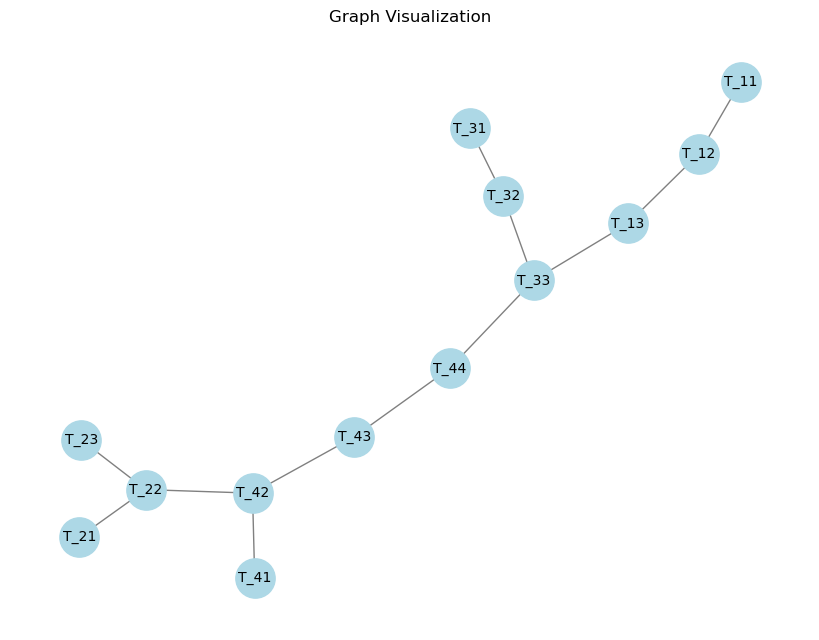

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, nodes=None):
        """
        Initialize the graph with a set of nodes.

        :param nodes: List of nodes in the graph
        """
        self.graph = {node: [] for node in nodes} if nodes else {}

    def add_nodes(self, nodes):
        """
        Add multiple nodes to the graph.

        :param nodes: List of nodes to add
        """
        for node in nodes:
            if node not in self.graph:
                self.graph[node] = []

    def add_edge(self, u, v):
        """
        Add an undirected edge between nodes u and v.

        :param u: First node
        :param v: Second node
        """
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)

    def _dfs_cycle_detection(self, node, visited, parent, cycle):
        """
        Helper method for detecting a cycle using DFS and storing it.

        :param node: Current node being visited
        :param visited: Set of visited nodes
        :param parent: Parent of the current node
        :param cycle: List to store nodes involved in a cycle
        :return: True if a cycle is detected, False otherwise
        """
        visited.add(node)
        cycle.append(node)

        for neighbor in self.graph[node]:
            if neighbor not in visited:
                if self._dfs_cycle_detection(neighbor, visited, node, cycle):
                    return True
            elif neighbor != parent:
                cycle.append(neighbor)
                return True

        cycle.pop()
        return False

    def find_cycles(self):
        """
        Find and print all cycles in the graph.

        :return: List of cycles detected in the graph
        """
        visited = set()
        cycles = []

        for node in self.graph:
            if node not in visited:
                cycle = []
                if self._dfs_cycle_detection(node, visited, None, cycle):
                    # Extract the actual cycle from the path
                    cycle_start = cycle[-1]
                    cycle_path = []
                    for n in reversed(cycle):
                        cycle_path.append(n)
                        if n == cycle_start and len(cycle_path) > 1:
                            break
                    cycles.append(cycle_path[::-1])

        return cycles


    def has_cycle(self):
        """
        Check if the graph contains a cycle.

        :return: True if a cycle is present, False otherwise
        """
        visited = set()

        for node in self.graph:
            if node not in visited:
                if self._dfs_cycle_detection(node, visited, None):
                    return True

        return False

    def draw_graph(self):
        """
        Draw the graph using matplotlib and networkx.
        """
        G = nx.Graph()

        for node, neighbors in self.graph.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)

        plt.figure(figsize=(8, 6))
        nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)
        plt.title("Graph Visualization")
        plt.show()


def get_nodes(hops):
    nodes = []
    for i in hops:
        nodes.append(f'T_{i[1][0]}{i[1][1]}')
    return nodes

    


def add_SC_edge(hops,graph):

    for i in hops:
        for j in hops:
            
            if i[1][0] == j[1][0] and i[1][1] == 1+j[1][1]:
                edge = (f'T_{i[1][0]}{i[1][1]}',f'T_{j[1][0]}{j[1][1]}')
                print(f'Adding Edge {edge}')
                graph.add_edge(edge[0],edge[1])
                
            if i[2] == j[2] and i[-1]==j[-1]:
                if (i[0]=='INSERT' and j[0]=='UPDATE') or (i[0]=='UPDATE' and j[0]=='INSERT') or (i[0]=='INSERT' and j[0]=='SELECT') or (i[0]=='SELECT' and j[0]=='INSERT') or (i[0]=='UPDATE' and j[0]=='SELECT') or (i[0]=='SELECT' and j[0]=='UPDATE'):
                    edge = (f'T_{i[1][0]}{i[1][1]}',f'T_{j[1][0]}{j[1][1]}')
                    print(f'Adding Edge {edge}')
                    graph.add_edge(edge[0],edge[1])
                    


                    


hops = generate_tableaccess_schedules(chops)
# print(hops)
nodes = get_nodes(hops)
# print(nodes)
graph = Graph(nodes)
add_SC_edge(hops,graph)

cycles = graph.find_cycles()

graph.draw_graph()


In [396]:
evaluation_set = {
    'T1': [('SELECT * FROM patients WHERE patient_id = %s', 1, [101]),
           ('SELECT * FROM doctors', 2, []),
           ('INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)',3, [301, 101, 201, ('2024-12-01 10:00:00'), ('scheduled')])
           ],
}
chops = {

            'T1': [('SELECT * FROM patients WHERE patient_id = %s', 1, [101]),
                   ('SELECT * FROM doctors', 2, []),
                   ('INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)',3, [301, 101, 201, ('2024-12-01 10:00:00'), ('scheduled')])
                   ],
            'T3': [('SELECT * FROM patients WHERE patient_id = %s', 1, [102]),
                   ('INSERT INTO billing (patient_id, appointment_id, amount) VALUES (%s, %s, %s)',7 , [102,302,100]),
                   ('UPDATE appointments SET status = %s WHERE appointment_id = %s',3, ['Completed',302])
                   ],
            'T2': [('SELECT * FROM patients WHERE patient_id = %s', 1, [103]),
                   ('INSERT INTO medical_records (record_id, patient_id, doctor_id, diagnosis, treatment) VALUES (%s,%s,%s,%s,%s)',4, [403, 103,303, 'Flu', 'Rest and hydration recommended']),
                   ('INSERT INTO prescriptions (prescription_id, patient_id, doctor_id, medication_name, dosage, duration) VALUES (%s,%s,%s,%s,%s,%s)',5, [503,103,303, 'Amoxicillin', '500 mg', '7 days'])
                   ],
            'T4': [('SELECT * FROM patients where patient_id = %s', 1, [103]),
                   ('SELECT * FROM medical_records WHERE patient_id = %s',4, [403]),
                   ('SELECT * from doctors WHERE specialization = %s',2, ['Cardiology']),
                   ('INSERT INTO appointments (appointment_id, patient_id, doctor_id, appointment_date, status) VALUES (%s,%s, %s, %s, %s)', 3, [304,103,203,('2024-12-11 10:00:00'),('scheduled')])
                   ],
}